In [4]:
!pip install autokeras


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import keras_tuner
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.wrappers import SKLearnClassifier
import keras.utils 
from keras.callbacks import * 


SVM-Kernels

Three different types of SVM-Kernels are displayed below.
The polynomial and RBF are especially useful when the
data-points are not linearly separable.



---------------- SVC of binary class ------------------

Some properties of Classifier
-------------------------------
clf.coef_       
    Coefficients for each feature 
    only for linear problem
clf.support_
    SupportVectorIndices 
    Vector of indices that specify the rows in the training data X, 
    that were selected as support vectors 
clf.support_vectors_  
    are subset of features (rows of X) which are used for decision boundary
clf.n_support_ 
    get number of support vectors for each class

clf.decision_function
    decision function that tells us how close to the seperating line we are 
    (close to the boundary means a low-confidence decision)
    Returns (n_samples, n_classes * (n_classes-1) / 2) for ovo, 
    for ovr, the shape is (n_samples, n_classes).
    each value is proportional to the dist

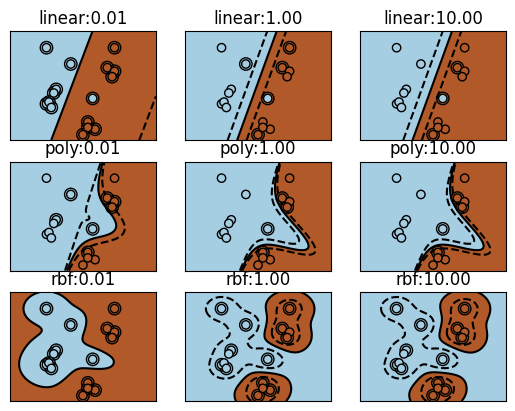

In [5]:
%run code/5.1.plot_svm_kernels.py

(330, 260)

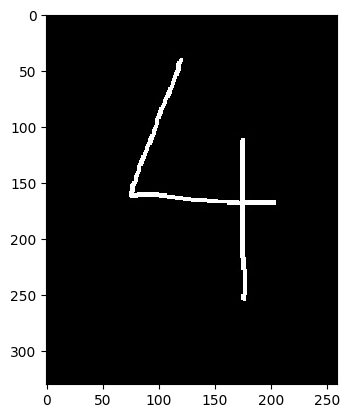

In [9]:
# Image
from PIL import Image
im = Image.open("code/data/4.jpg").convert('L')  # L for grayscale
data = np.asarray(im)   # 2D
#invert such that white become black  as jpeg spec and sklearn understanding is inverse 
plt.imshow(data, cmap=plt.cm.gray_r, interpolation='nearest')  #cmap is color map, we use gray pallet
#what is data shape?  
data.shape #(330, 260)

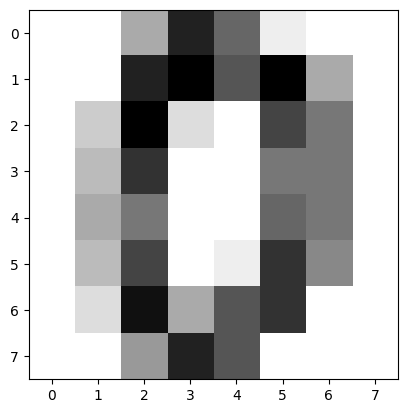

In [12]:
digits = load_digits()  #handwritten image repo 
X, y = digits.data , digits.target  #what is image size- 1797,64 , means 1797 images of 8x8, plot one using imshow
#what y shape = (1797,), print target = 0,1,...,10
plt.imshow(X[0].reshape(8,-1), cmap=plt.cm.gray_r, interpolation='nearest')

In [15]:
pca1 = PCA()
svm1 = SVC(kernel='rbf', gamma='scale')
pipe = Pipeline([('reduce_dim', pca1),('clf', svm1)])
param_grid = dict(reduce_dim__n_components=[2,5,10,20],clf__C=[0.01, 0.1, 1, 10,100])
search = GridSearchCV(pipe, param_grid)
search.fit(X,y)
yHat = search.predict(X)
confusion_matrix(y,yHat)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]])

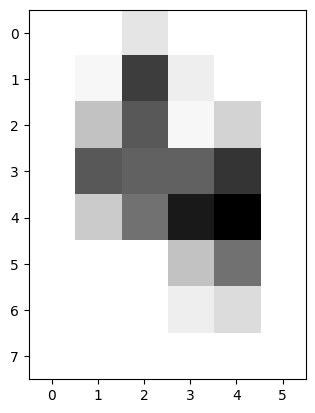

In [29]:
im.thumbnail( (8,8) ) # mutates
plt.imshow(255-np.asarray(im), cmap=plt.cm.gray_r, interpolation='nearest')

In [25]:
data = np.asarray(im)
data.shape
data = 255-data
data = np.hstack( (data, np.array([0]*16).reshape(8,2)) )
data

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  1, 22,  2,  0,  0,  0,  0],
       [ 0,  7, 19,  1,  5,  0,  0,  0],
       [ 0, 19, 18, 18, 23,  0,  0,  0],
       [ 0,  6, 16, 26, 29,  0,  0,  0],
       [ 0,  0,  0,  7, 16,  0,  0,  0],
       [ 0,  0,  0,  2,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

In [27]:
search.predict([data.ravel()])

array([4])

In [44]:
im = Image.open("code/data/6.jpg").convert('L')  # L for grayscale
im.thumbnail((8,8))
data = np.asarray(im)   # 2D
data = 255 - data
data = np.vstack( (np.array([0]*2*8).reshape(2,8), data, np.array([0]*3*8).reshape(3,8)) )
data[:,:] = 0
data[:,5] = 255
data[:,2] = 255
data[0,3] = 255
data[7,3] = 255
data

array([[  0,   0, 255, 255,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255, 255,   0, 255,   0,   0]])

In [43]:
search.predict([data.ravel()])

array([1])

# Decision Tree

In [45]:
%run code/6.1.decision_tree.py

------------------------ iris data DecisionTreeClassifier ---------
With entropy
check default value of all params
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Training Accuracy 1.0
Test data Accuracy 0.9736842105263158
Predicted class for test data ...
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
the probability of each class can be predicted(test data)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

# GBM

In [47]:
digits = load_digits()  #handwritten image repo 
X, y = digits.data , digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y)
gbm = GradientBoostingClassifier()
param_grid = dict(
    n_estimators=[500, 1000, 200],
    subsample=[ 1, 0.5, 0.1],
    learning_rate=[0.1,0.05,0.001]
    )
search = RandomizedSearchCV(gbm, param_grid)
search.fit(X_train, y_train)
print(search.best_estimator_)
print(search.best_params_)
yHat = search.predict(X_test)
confusion_matrix(y_test,yHat)

GradientBoostingClassifier(n_estimators=500, subsample=1)
{'subsample': 1, 'n_estimators': 500, 'learning_rate': 0.1}


array([[44,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1, 41,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 39]])

In [48]:
im = Image.open("code/data/6.jpg").convert('L')  # L for grayscale
im.thumbnail((8,8))
data = np.asarray(im)   # 2D
data = 255 - data
data = np.vstack( (np.array([0]*2*8).reshape(2,8), data, np.array([0]*3*8).reshape(3,8)) )
search.predict([data.ravel()])

array([7])

In [54]:
df = pd.read_csv('code/data/mushroom.csv')
dataset = df.values
X_raw = dataset[:, 1:]
y_raw = dataset[:, 0]

In [53]:
X.shape
y.shape

(8123,)

In [55]:
oh = OneHotEncoder()
X = oh.fit_transform(X_raw)

In [58]:
X.shape


(8123, 20)

In [59]:
df = pd.read_csv('code/data/mushroom.csv')
dataset = df.values
X_raw = dataset[:, 1:]
y_raw = dataset[:, 0]

oh = OneHotEncoder()
X = oh.fit_transform(X_raw)
enc = LabelEncoder()
y = enc.fit_transform(y_raw)

In [60]:
X.shape, y.shape

((8123, 20), (8123,))

In [64]:
np.asarray(X.todense())

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# DNN

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Input 


#ie 0,0 => 0 
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
#Regular densely-connected NN layer.
#32 , dimensionality of the output space.
#activation: Activation function to use . 
#input_dim= n , for n features or (x,y) for 2D feature 
model.add(Input(shape=(2,)))
model.add(Dense(32,  activation='relu'))
#use relu for internal and for classification, use sigmoid or softmax 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=100, verbose=2)

scores = model.evaluate(training_data, target_data) #here metrics are used 
#returns [ test loss, accuracy]
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
1/1 - 7s - 7s/step - binary_accuracy: 0.7500 - loss: 0.2564
Epoch 2/100
1/1 - 0s - 107ms/step - binary_accuracy: 0.5000 - loss: 0.2558
Epoch 3/100
1/1 - 0s - 62ms/step - binary_accuracy: 0.5000 - loss: 0.2551
Epoch 4/100
1/1 - 0s - 63ms/step - binary_accuracy: 0.5000 - loss: 0.2544
Epoch 5/100
1/1 - 0s - 48ms/step - binary_accuracy: 0.5000 - loss: 0.2538
Epoch 6/100
1/1 - 0s - 74ms/step - binary_accuracy: 0.5000 - loss: 0.2532
Epoch 7/100
1/1 - 0s - 116ms/step - binary_accuracy: 0.5000 - loss: 0.2525
Epoch 8/100
1/1 - 0s - 84ms/step - binary_accuracy: 0.5000 - loss: 0.2519
Epoch 9/100
1/1 - 0s - 57ms/step - binary_accuracy: 0.5000 - loss: 0.2513
Epoch 10/100
1/1 - 0s - 66ms/step - binary_accuracy: 0.5000 - loss: 0.2507
Epoch 11/100
1/1 - 0s - 60ms/step - binary_accuracy: 0.5000 - loss: 0.2501
Epoch 12/100
1/1 - 0s - 47ms/step - binary_accuracy: 0.5000 - loss: 0.2495
Epoch 13/100
1/1 - 0s - 53ms/step - binary_accuracy: 0.5000 - loss: 0.2489
Epoch 14/100
1/1 - 0s - 63ms/step 

In [2]:
#in float64
#for binary, round it 
predictions = model.predict(training_data)
rounded = [round(x[0]) for x in predictions]
print(rounded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
[0, 1, 1, 0]
